In [21]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
sns.set()
sns.set_style("whitegrid")

In [2]:
with open('FT.pickle','rb') as f:
    FT=pickle.load(f)

In [30]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import pywt

#INPUT
Number_of_Data=100
Number_of_Sensor=2
Number_of_Feature=9
wavelet=pywt.Wavelet('sym2')
Level=12
select=9

In [31]:
#P-value 추출
b=np.zeros(shape=(Number_of_Sensor*Number_of_Feature*(select+1),2))
#size(matrix,n)--> matrix의 n번째 차원의 size를 구하라
for i in np.arange(Number_of_Sensor*Number_of_Feature*(select+1)):
    a=np.array(sp.ttest_ind(FT[1,i,:],FT[0,i,:],equal_var=False))
    #sp.ttest_ind 두개의 독립표본 t test--> 두 집단 사이의 Mean 비교
    #고장과 정상에서의 Feature들이 변인이 되는가?
    b[i,0]=a[1]
    b[i,1]=i
b=pd.DataFrame(b)
#유효 p value를 가지 Feature를 찾기 위해 번호를 붙이고 DataFrame 형태롤 변형
b=np.array(b.sort_values([0],ascending=[True])) #sort_value 함수로 오름차순
#pandas 인덱스값 가져올 수 있는 지 확인해보기
del i,a

In [32]:
#p-value 기반 상위 특징요소 선택하기

Rank= 10
New_Feature=np.zeros(shape=(2,Rank,np.size(FT,2)))
for i in np.arange(Rank):
    
    New_Feature[:,i,:]=np.array(FT[:,int(b[i,1]),:])

del i

In [33]:
with open('New_Feature.pickle','wb') as f:
    pickle.dump(New_Feature,f,pickle.HIGHEST_PROTOCOL)
with open('Select.pickle','wb') as f:
    pickle.dump(b,f,pickle.HIGHEST_PROTOCOL)

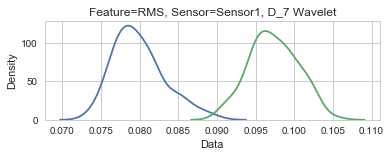

In [34]:
Normal = FT[0,:,:]
AbNormal = FT[1,:,:]

# N번째 P-value Feature
FeatureRank = 10

x= Normal[int(b[FeatureRank,1]),:]
y= AbNormal[int(b[FeatureRank,1]),:]

Feature_Order=b[FeatureRank,1]

def Finding(Feature_Order):
    a=Feature_Order%Number_of_Feature
    Feature={0:'Max',1:'Min',2:'Mean',3:'Var',4:'RMS',5:'Skewness',6:'Kurtosis',7:'b',8:'kurtosis'}.get(a,'deafault')#a값을 대입 후 나머지 deafault
    b=(Feature_Order/Number_of_Feature-Feature_Order//Number_of_Feature)>=0.5
    Sensor={0:'Sensor1',1:'Sensor2'}.get(b,'default')
    c=Feature_Order//(Number_of_Feature*Number_of_Sensor)
    Level={0:'Time_Domain',1:'Approximate'}.get(c,'D_%d Wavelet'%c)
    return 'Feature=%s, Sensor=%s, %s'%(Feature,Sensor,Level)

Name=Finding(Feature_Order)
#http://seaborn.pydata.org/generated/seaborn.kdeplot.html 참조
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
#k density 그래프 도시
sns.kdeplot(x,kernel = 'gau', legend = True)
sns.kdeplot(y,kernel = 'gau', legend = True)
#ax1.bar([0.05],[1000],width=0.0003,color='r')#bar를 plot
plt.title(Name)
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend(['Normal','Abnormal'])
plt.show()